In [1]:
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

from scipy import integrate
# import scipy.signal as scipy
from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


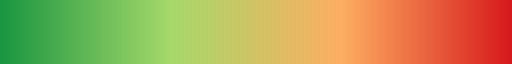

In [4]:
cmap

# Reading Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230901_sapphire'
subfolder = glob.glob(cwd + '/Quinine**H2SO4**')
subfolder.sort()
# subfolder_Abs = glob.glob(cwd + '/quinine**Abs**')
# subfolder_Abs.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line
# print(*subfolder_Abs, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230901_sapphire/Quinine_1E-4M_H2SO4_050mM
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230901_sapphire/Quinine_2E-4M_H2SO4_050mM
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/20230901_sapphire/Quinine_5E-4M_H2SO4_050mM


### Sort data files into various folders according to experiment conditions

In [6]:
# quinine_con = ['1E-4', '2E-4', '5E-4']
# integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']
# for i in range(len(subfolder)):
#     for j in range(len(integration_time)):
#         data_files = glob.glob(subfolder[i] + f'/**{integration_time[j]}**Subt**')

# Flurorescence (PL)

## Read PL data into pandas dataframe

In [7]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df = pd.DataFrame()
quinine_con = ['1E-4M', '2E-4M', '5E-4M']
integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']

for i in range(len(subfolder)):
    for j in range(len(integration_time)):
        data_files = glob.glob(subfolder[i] + f'/**{integration_time[j]}**Subt**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = quinine_con[i] + '_' + integration_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'PL_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'PL_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df[f'x_{suffix}'] = df_int['Wavelength']
        df[f'{suffix}_mean'] = df_temp.mean(axis=1)
    

In [8]:
df

,x_1E-4M_200ms,1E-4M_200ms_mean,x_1E-4M_300ms,1E-4M_300ms_mean,x_1E-4M_400ms,1E-4M_400ms_mean,x_1E-4M_2000ms,1E-4M_2000ms_mean,x_1E-4M_3000ms,1E-4M_3000ms_mean,...,x_5E-4M_300ms,5E-4M_300ms_mean,x_5E-4M_400ms,5E-4M_400ms_mean,x_5E-4M_2000ms,5E-4M_2000ms_mean,x_5E-4M_3000ms,5E-4M_3000ms_mean,x_5E-4M_4000ms,5E-4M_4000ms_mean
0,197.742,0.3975,197.742,-0.2275,197.742,0.1775,197.742,0.455,197.742,-0.125,...,197.742,-0.1175,197.742,0.1725,197.742,-0.810,197.742,-0.610,197.742,0.050
1,198.544,0.6700,198.544,0.4200,198.544,1.0625,198.544,3.545,198.544,5.060,...,198.544,1.6550,198.544,2.6650,198.544,11.375,198.544,17.610,198.544,24.355
2,199.347,0.7950,199.347,0.7900,199.347,1.5225,199.347,5.675,199.347,8.915,...,199.347,2.9825,199.347,4.1750,199.347,18.375,199.347,29.295,199.347,40.305
3,200.149,0.8700,200.149,1.1325,200.149,1.8950,200.149,7.795,200.149,11.600,...,200.149,3.7350,200.149,5.2150,200.149,23.325,200.149,38.020,200.149,51.975
4,200.951,1.0475,200.951,1.5125,200.951,2.3875,200.951,10.315,200.951,16.080,...,200.951,5.3175,200.951,7.0300,200.951,30.930,200.951,50.590,200.951,69.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,-0.0975,990.770,0.7250,990.770,1.3400,990.770,4.440,990.770,6.210,...,990.770,0.2525,990.770,0.5625,990.770,1.445,990.770,5.485,990.770,7.435
1040,991.489,0.1000,991.489,0.5750,991.489,0.7525,991.489,2.835,991.489,4.775,...,991.489,0.1850,991.489,0.2600,991.489,1.000,991.489,4.165,991.489,5.365
1041,992.208,-0.2250,992.208,0.5500,992.208,0.7000,992.208,2.110,992.208,4.230,...,992.208,0.1350,992.208,0.1925,992.208,1.125,992.208,3.110,992.208,4.640
1042,992.928,-0.2625,992.928,0.4275,992.928,0.3575,992.928,1.095,992.928,2.310,...,992.928,0.2175,992.928,0.0500,992.928,1.075,992.928,2.135,992.928,2.650


## Check data in pd dataframe

In [9]:
df.keys()

Index(['x_1E-4M_200ms', '1E-4M_200ms_mean', 'x_1E-4M_300ms',
       '1E-4M_300ms_mean', 'x_1E-4M_400ms', '1E-4M_400ms_mean',
       'x_1E-4M_2000ms', '1E-4M_2000ms_mean', 'x_1E-4M_3000ms',
       '1E-4M_3000ms_mean', 'x_1E-4M_4000ms', '1E-4M_4000ms_mean',
       'x_2E-4M_200ms', '2E-4M_200ms_mean', 'x_2E-4M_300ms',
       '2E-4M_300ms_mean', 'x_2E-4M_400ms', '2E-4M_400ms_mean',
       'x_2E-4M_2000ms', '2E-4M_2000ms_mean', 'x_2E-4M_3000ms',
       '2E-4M_3000ms_mean', 'x_2E-4M_4000ms', '2E-4M_4000ms_mean',
       'x_5E-4M_200ms', '5E-4M_200ms_mean', 'x_5E-4M_300ms',
       '5E-4M_300ms_mean', 'x_5E-4M_400ms', '5E-4M_400ms_mean',
       'x_5E-4M_2000ms', '5E-4M_2000ms_mean', 'x_5E-4M_3000ms',
       '5E-4M_3000ms_mean', 'x_5E-4M_4000ms', '5E-4M_4000ms_mean'],
      dtype='object')

In [10]:
df.shape

(1044, 36)

## Prepare keys for average scans in pd dataframe

In [11]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_1E-4M_200ms',
 '1E-4M_200ms_mean',
 'x_1E-4M_300ms',
 '1E-4M_300ms_mean',
 'x_1E-4M_400ms',
 '1E-4M_400ms_mean',
 'x_1E-4M_2000ms',
 '1E-4M_2000ms_mean',
 'x_1E-4M_3000ms',
 '1E-4M_3000ms_mean',
 'x_1E-4M_4000ms',
 '1E-4M_4000ms_mean',
 'x_2E-4M_200ms',
 '2E-4M_200ms_mean',
 'x_2E-4M_300ms',
 '2E-4M_300ms_mean',
 'x_2E-4M_400ms',
 '2E-4M_400ms_mean',
 'x_2E-4M_2000ms',
 '2E-4M_2000ms_mean',
 'x_2E-4M_3000ms',
 '2E-4M_3000ms_mean',
 'x_2E-4M_4000ms',
 '2E-4M_4000ms_mean',
 'x_5E-4M_200ms',
 '5E-4M_200ms_mean',
 'x_5E-4M_300ms',
 '5E-4M_300ms_mean',
 'x_5E-4M_400ms',
 '5E-4M_400ms_mean',
 'x_5E-4M_2000ms',
 '5E-4M_2000ms_mean',
 'x_5E-4M_3000ms',
 '5E-4M_3000ms_mean',
 'x_5E-4M_4000ms',
 '5E-4M_4000ms_mean']

In [12]:
# title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
title = keys_list[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

1E-4M_200ms_mean
1E-4M_300ms_mean
1E-4M_400ms_mean
1E-4M_2000ms_mean
1E-4M_3000ms_mean
1E-4M_4000ms_mean
2E-4M_200ms_mean
2E-4M_300ms_mean
2E-4M_400ms_mean
2E-4M_2000ms_mean
2E-4M_3000ms_mean
2E-4M_4000ms_mean
5E-4M_200ms_mean
5E-4M_300ms_mean
5E-4M_400ms_mean
5E-4M_2000ms_mean
5E-4M_3000ms_mean
5E-4M_4000ms_mean


## Plot all PL scans together

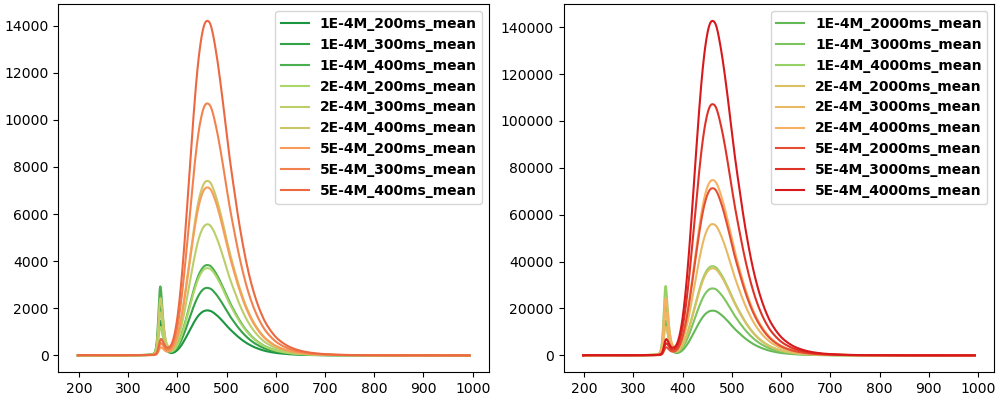

In [13]:
f1, ax1 = plt.subplots(1, 2, figsize = (10, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 18

for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    t = re.findall(r'\d+', title[i])[-1]
    if int(t) < 500:
        ax1[0].plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])
    else:
        ax1[1].plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax1[0].legend(prop=legend_properties)
ax1[1].legend(prop=legend_properties)

# ax1.set_xlim(-0.5, 20)
# ax1.set_ylim(2500, 9500)
# ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax1.spines["bottom"].set_linewidth(spinewidth)
# ax1.spines["right"].set_linewidth(spinewidth)
# ax1.spines["top"].set_linewidth(spinewidth)
# ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)


### Define integrate range ###
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

wavelength_range = [390, 750]
idx_w0, w0 = find_nearest(df[keys_list[0]], wavelength_range[0])
idx_w1, w1 = find_nearest(df[keys_list[0]], wavelength_range[1])

# ax1.axvline(w0)
# ax1.axvline(w1)

## Create new folder "plqy" for saving data

In [14]:
new_dir = cwd + '/plqy'

try:
    os.mkdir(new_dir)
except FileExistsError:
    pass

# if os.path.exists(new_dir):
#     pass
# else:
#     os.mkdir(new_dir)

## Integrate peak area

In [15]:
simpson_int = []
for i in range(len(title)):
    x = df[keys_list[i*2]][idx_w0:idx_w1]
    y = df[keys_list[i*2+1]][idx_w0:idx_w1]
    simpson_int.append(integrate.simpson(y, x))

df_int = pd.DataFrame()
df_int['Data_source'] = [title[i] for i in range(len(title))]
df_int['Simpson_integrate'] = simpson_int
df_int

,Data_source,Simpson_integrate
0,1E-4M_200ms_mean,1.941310e+05
1,1E-4M_300ms_mean,2.915938e+05
2,1E-4M_400ms_mean,3.902861e+05
3,1E-4M_2000ms_mean,1.939093e+06
4,1E-4M_3000ms_mean,2.902162e+06
5,1E-4M_4000ms_mean,3.866773e+06
6,2E-4M_200ms_mean,3.763676e+05
7,2E-4M_300ms_mean,5.653585e+05
8,2E-4M_400ms_mean,7.528662e+05
9,2E-4M_2000ms_mean,3.772568e+06


## Save Simpson integrate of PL peak

In [16]:
# df_int.to_csv(os.path.join(new_dir, 'Quinine_sapphire_simpson_integrate.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [17]:
# df_int.to_csv('Quinine_sapphire_simpson_integrate.txt', index=False, sep=' ', float_format='{:.5e}'.format)

# Absorbance

### Read Abs data into pandas dataframe

In [18]:
# df_x = pd.DataFrame()
# df_int = pd.DataFrame()
df2 = pd.DataFrame()
quinine_con = ['1E-4M', '2E-4M', '5E-4M']
integration_time = ['200ms', '300ms', '400ms', '2000ms', '3000ms', '4000ms']

for i in range(len(subfolder)):
    for j in range(len(integration_time[:3])):
        # data_files = subfolder
        data_files = glob.glob(subfolder[i] + f'/**{integration_time[j]}**Absorbance**')
        data_files.sort()
        # del data_files[0]
        # suffix = os.path.basename(subfolder_PL[i])
        suffix = quinine_con[i] + '_' + integration_time[j]
        # id0 = 8
        # id1 = 22

        skiprows = 14 ## skip 23 rows if data processed by dioptas or ## 8
        df_int = pd.DataFrame()
        df_temp = pd.DataFrame()

        for k in range(len(data_files)):        
            df_int = pd.read_csv(data_files[k], skiprows=skiprows, sep='\t', names=['Wavelength', f'Abs_{k:03d}'])
            df_temp = pd.concat([df_temp, df_int[f'Abs_{k:03d}']], axis=1, ignore_index=False)
        
        # df_temp[f'{suffix}_mean'] = df_temp.mean(axis=1)
        # df_temp = pd.read_csv(data_files[i], skiprows=skiprows, sep=',')
        df2[f'x_{suffix}'] = df_int['Wavelength']
        df2[f'{suffix}_mean'] = df_temp.mean(axis=1)


In [19]:
df2

,x_1E-4M_200ms,1E-4M_200ms_mean,x_1E-4M_300ms,1E-4M_300ms_mean,x_1E-4M_400ms,1E-4M_400ms_mean,x_2E-4M_200ms,2E-4M_200ms_mean,x_2E-4M_300ms,2E-4M_300ms_mean,x_2E-4M_400ms,2E-4M_400ms_mean,x_5E-4M_200ms,5E-4M_200ms_mean,x_5E-4M_300ms,5E-4M_300ms_mean,x_5E-4M_400ms,5E-4M_400ms_mean
0,197.742,-0.2225,197.742,-0.1525,197.742,-0.1825,197.742,-0.0375,197.742,0.0075,197.742,-0.0475,197.742,0.2525,197.742,0.25,197.742,0.1900
1,198.544,-0.0600,198.544,-0.0300,198.544,-0.0100,198.544,0.2600,198.544,0.2625,198.544,0.2600,198.544,0.5800,198.544,0.58,198.544,0.5825
2,199.347,-0.0600,199.347,-0.0300,199.347,-0.0100,199.347,0.2550,199.347,0.2550,199.347,0.2550,199.347,0.5725,199.347,0.58,199.347,0.5775
3,200.149,-0.0600,200.149,-0.0300,200.149,-0.0100,200.149,0.2600,200.149,0.2600,200.149,0.2600,200.149,0.5800,200.149,0.58,200.149,0.5800
4,200.951,-0.0600,200.951,-0.0300,200.951,-0.0100,200.951,0.2600,200.951,0.2600,200.951,0.2600,200.951,0.5800,200.951,0.58,200.951,0.5825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,990.770,-0.2100,990.770,-0.1800,990.770,-0.1600,990.770,-0.0200,990.770,-0.0200,990.770,-0.0200,990.770,0.2000,990.770,0.20,990.770,0.2000
1040,991.489,-0.2100,991.489,-0.1800,991.489,-0.1600,991.489,-0.0200,991.489,-0.0200,991.489,-0.0200,991.489,0.2000,991.489,0.20,991.489,0.2000
1041,992.208,-0.2100,992.208,-0.1800,992.208,-0.1600,992.208,-0.0200,992.208,-0.0200,992.208,-0.0200,992.208,0.2000,992.208,0.20,992.208,0.2000
1042,992.928,-0.2025,992.928,-0.1800,992.928,-0.1600,992.928,-0.0200,992.928,-0.0200,992.928,-0.0200,992.928,0.2000,992.928,0.20,992.928,0.2000


## Prepare keys for average scans in pd dataframe

In [20]:
keys_list2 = list(df2.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_1E-4M_200ms',
 '1E-4M_200ms_mean',
 'x_1E-4M_300ms',
 '1E-4M_300ms_mean',
 'x_1E-4M_400ms',
 '1E-4M_400ms_mean',
 'x_2E-4M_200ms',
 '2E-4M_200ms_mean',
 'x_2E-4M_300ms',
 '2E-4M_300ms_mean',
 'x_2E-4M_400ms',
 '2E-4M_400ms_mean',
 'x_5E-4M_200ms',
 '5E-4M_200ms_mean',
 'x_5E-4M_300ms',
 '5E-4M_300ms_mean',
 'x_5E-4M_400ms',
 '5E-4M_400ms_mean']

In [21]:
# title = [os.path.basename(subfolder_Abs[i]) for i in range(len(subfolder_Abs))]
title = keys_list2[1::2]
print(*title, sep='\n')

# label1 = ['quinine_1E-4M', 'quinine_2E-4M', 'quinine_5E-4M']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label2 = ['200ms', '300ms']
#          # 'ZnI2 128 uL/min']

1E-4M_200ms_mean
1E-4M_300ms_mean
1E-4M_400ms_mean
2E-4M_200ms_mean
2E-4M_300ms_mean
2E-4M_400ms_mean
5E-4M_200ms_mean
5E-4M_300ms_mean
5E-4M_400ms_mean


## Plot all Abs scans together

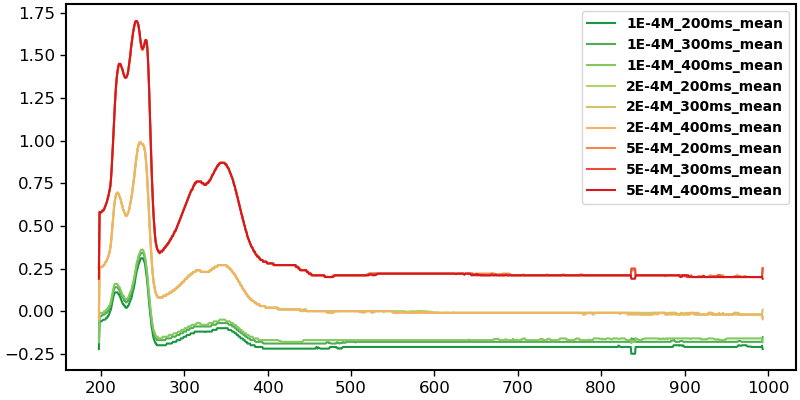

In [22]:
f2, ax2 = plt.subplots(1, 1, figsize = (8, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 18

for i in range(len(title)):
    # ax2.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax2.plot(df2[keys_list2[i*2]], df2[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(prop=legend_properties)

# ax2.set_xlim(-0.5, 20)
# ax2.set_ylim(2500, 9500)
# ax2.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax2.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Try linear fitting

In [23]:
def line_2D(x, slope, y_intercept):
    y = x*slope + y_intercept
    return y


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def fit_line_2D(x, y, fit_function, x_range=[500, 900], maxfev=10000, plot=True):
    x = np.asarray(x)
    y = np.asarray(y)
    y = np.nan_to_num(y, nan=0)
    
    try:        
        idx0, _ = find_nearest(x, x_range[0])
        idx1, _ = find_nearest(x, x_range[1])
    except (TypeError, IndexError):
        idx0 = 0
        idx1 = -1
    
    slope = (y[idx1]-y[idx0]) / (x[idx1]-x[idx0])
    y_intercept = np.mean(y[idx0:idx1])
    
    try:
        initial_guess = [slope, y_intercept]
    except (TypeError, IndexError):
        initial_guess = [0.01, 0]
    
    try:
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
    except RuntimeError:
        maxfev=1000000
        popt, pcov = curve_fit(fit_function, x[idx0:idx1], y[idx0:idx1], p0=initial_guess, maxfev=maxfev)
        
    if plot:
        plt.figure()
        plt.plot(x, y, label='data')
        plt.plot(x, fit_function(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
        plt.legend()
    
    return popt, pcov


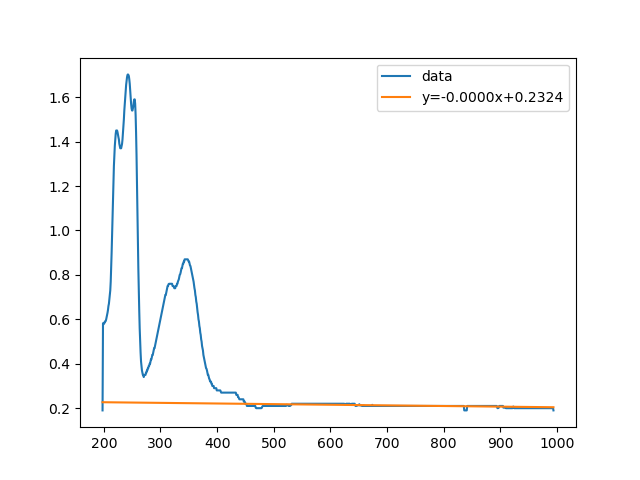

In [24]:
x = df2[keys_list2[-2]]
y = df2[keys_list2[-1]]
x_range=[500, 900]
idx0, v0 = find_nearest(x, x_range[0])
idx1, v1 = find_nearest(x, x_range[1])
popt, pcov = fit_line_2D(x,y,line_2D, x_range=[500, 900])

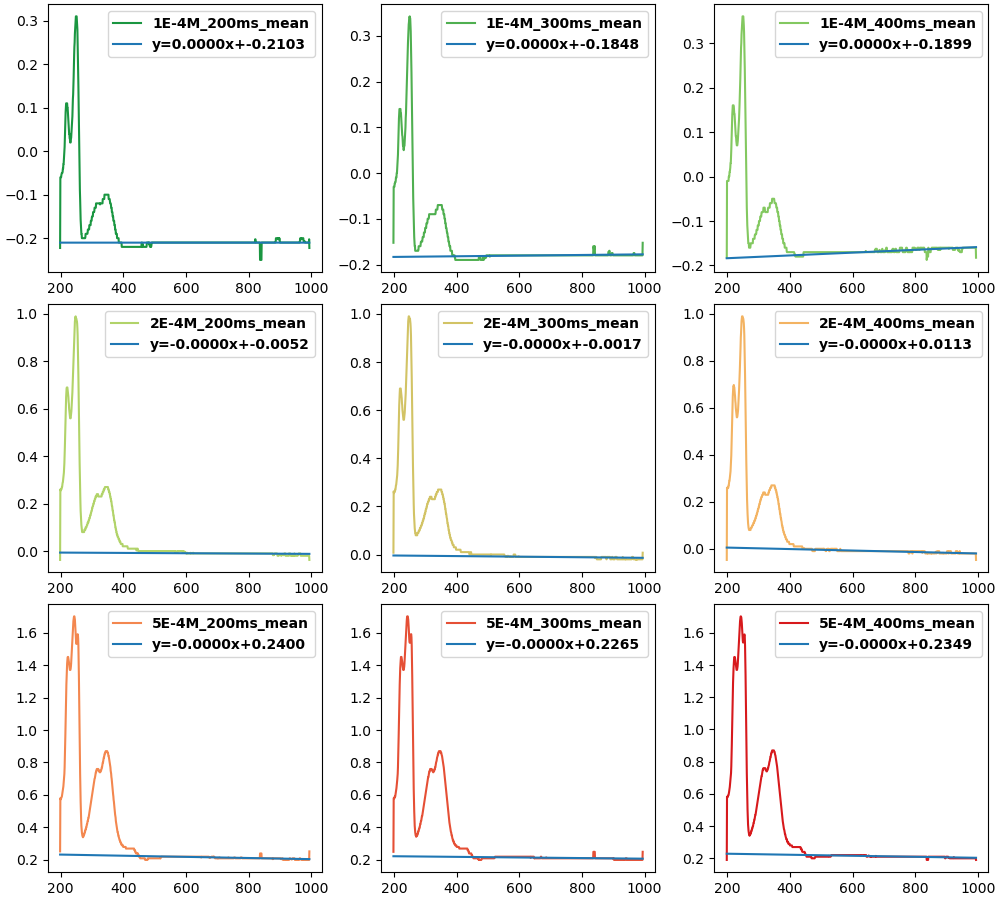

In [25]:
rows = 3
cols = 3
f3, ax3 = plt.subplots(rows, cols, figsize = (10, 9), constrained_layout=True)

label = title
title_reshape = np.asarray(title).reshape(rows, cols)
color_idx = np.linspace(0, 1, len(title))
id0 = 8
id1 = 22
x_range_list = [[600, 900], [600, 900], 
                [600, 900], [600, 900], 
                [400, 900], [800, 900],
               ]

legend_properties = {'weight':'bold', 'size':10}
df4 = pd.DataFrame()
for i in range(len(title)):
    # ax1.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    idx_ax = np.argwhere(title_reshape==title[i])
    x = df2[keys_list2[i*2]]
    y = df2[keys_list2[i*2+1]]
    popt, pcov = fit_line_2D(x, y, line_2D, x_range=x_range_list[0], plot=False)
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, y, color=cmap(color_idx[i]), label=label[i][:id1])
    ax3[idx_ax[0][0], idx_ax[0][1]].plot(x, line_2D(x, popt[0], popt[1]), label=f'y={popt[0]:.4f}x+{popt[1]:.4f}')
    ax3[idx_ax[0][0], idx_ax[0][1]].legend(prop=legend_properties)
    
    df4[keys_list2[i*2]] = x
    # df4[keys_list2[i*2+1]] = y - popt[1]
    df4[keys_list2[i*2+1]] = y - line_2D(x, *popt)
    

# # ax3.set_xlim(-0.5, 20)
# # ax3.set_ylim(2500, 9500)
# # ax3.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# # ax3.set_ylabel('Intensity', fontsize=16, fontweight='regular')
# ax3.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
# spinewidth = 1.5
# ax3.spines["bottom"].set_linewidth(spinewidth)
# ax3.spines["right"].set_linewidth(spinewidth)
# ax3.spines["top"].set_linewidth(spinewidth)
# ax3.spines["left"].set_linewidth(spinewidth)

## Plot Abs by offset

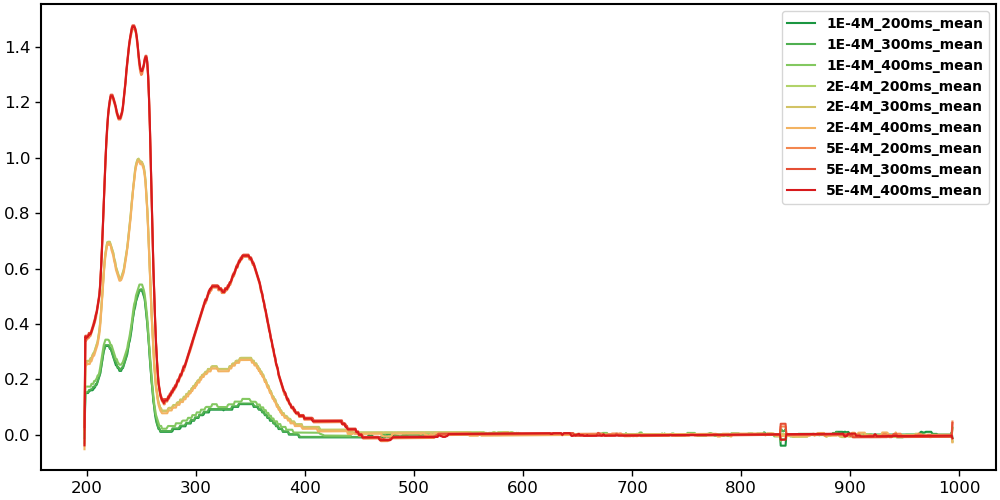

In [26]:
f4, ax4 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
# linestyle = ['solid', 'dashed', 'solid', 'dashed', 'solid', 'dashed']
id0 = 8
id1 = 18

for i in range(len(title)):
    # ax4.plot(df_tth.iloc[:,i], df_int[k1[i]]+offset*i, color=cmap(color_idx[i]), label=label[i])
    ax4.plot(df4[keys_list2[i*2]], df4[keys_list2[i*2+1]], color=cmap(color_idx[i]), label=label[i][:id1])

legend_properties = {'weight':'bold', 'size':10}    
ax4.legend(prop=legend_properties)

# ax4.set_xlim(-0.5, 20)
# ax4.set_ylim(2500, 9500)
# ax4.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
# ax4.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax4.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax4.spines["bottom"].set_linewidth(spinewidth)
ax4.spines["right"].set_linewidth(spinewidth)
ax4.spines["top"].set_linewidth(spinewidth)
ax4.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

## Prepare keys for offset data in pd dataframe

In [27]:
keys_list4 = list(df4.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list4

['x_1E-4M_200ms',
 '1E-4M_200ms_mean',
 'x_1E-4M_300ms',
 '1E-4M_300ms_mean',
 'x_1E-4M_400ms',
 '1E-4M_400ms_mean',
 'x_2E-4M_200ms',
 '2E-4M_200ms_mean',
 'x_2E-4M_300ms',
 '2E-4M_300ms_mean',
 'x_2E-4M_400ms',
 '2E-4M_400ms_mean',
 'x_5E-4M_200ms',
 '5E-4M_200ms_mean',
 'x_5E-4M_300ms',
 '5E-4M_300ms_mean',
 'x_5E-4M_400ms',
 '5E-4M_400ms_mean']

## Save offset data as csv

In [28]:
for i in range(len(title)):
    df_temp = pd.DataFrame()
    df_temp['Wavelength'] = df4[keys_list4[i*2]].fillna(0)
    df_temp['Absorbance'] = df4[keys_list4[i*2+1]].fillna(0)
    fn = title[i][:id1] + '_offset.csv'
    print(fn)
    # df_temp.to_csv(os.path.join(new_dir, fn), index=False, sep=',', float_format='{:.8e}'.format)

1E-4M_200ms_mean_offset.csv
1E-4M_300ms_mean_offset.csv
1E-4M_400ms_mean_offset.csv
2E-4M_200ms_mean_offset.csv
2E-4M_300ms_mean_offset.csv
2E-4M_400ms_mean_offset.csv
5E-4M_200ms_mean_offset.csv
5E-4M_300ms_mean_offset.csv
5E-4M_400ms_mean_offset.csv


## Save Absorbance at 365 nm

In [29]:
idx_365, w365 = find_nearest(df4[keys_list2[0]], 365)
# df4.iloc[idx_365][::-2][::-1].to_list()

df_365 = pd.DataFrame()
df_365['Data_source'] = [title[i] for i in range(len(title))]
df_365['Abs_365'] = df2.iloc[idx_365][1::2].to_list()
df_365['Abs_offset_365'] = df4.iloc[idx_365][1::2].to_list()
df_365

,Data_source,Abs_365,Abs_offset_365
0,1E-4M_200ms_mean,-0.14,0.070256
1,1E-4M_300ms_mean,-0.11,0.072247
2,1E-4M_400ms_mean,-0.10,0.078462
3,2E-4M_200ms_mean,0.18,0.187663
4,2E-4M_300ms_mean,0.18,0.186101
5,2E-4M_400ms_mean,0.18,0.180142
6,5E-4M_200ms_mean,0.65,0.422843
7,5E-4M_300ms_mean,0.65,0.430381
8,5E-4M_400ms_mean,0.65,0.426695


In [30]:
# df_365.to_csv(os.path.join(new_dir, 'Quinine_sapphire_abs_365.csv'), index=False, sep=',', float_format='{:.8e}'.format)

In [31]:
# df_365.to_csv('Quinine_sapphire_abs_365.txt', index=False, sep=' ', float_format='{:.5e}'.format)

In [32]:
df2.keys()

Index(['x_1E-4M_200ms', '1E-4M_200ms_mean', 'x_1E-4M_300ms',
       '1E-4M_300ms_mean', 'x_1E-4M_400ms', '1E-4M_400ms_mean',
       'x_2E-4M_200ms', '2E-4M_200ms_mean', 'x_2E-4M_300ms',
       '2E-4M_300ms_mean', 'x_2E-4M_400ms', '2E-4M_400ms_mean',
       'x_5E-4M_200ms', '5E-4M_200ms_mean', 'x_5E-4M_300ms',
       '5E-4M_300ms_mean', 'x_5E-4M_400ms', '5E-4M_400ms_mean'],
      dtype='object')

In [33]:
df.keys()

Index(['x_1E-4M_200ms', '1E-4M_200ms_mean', 'x_1E-4M_300ms',
       '1E-4M_300ms_mean', 'x_1E-4M_400ms', '1E-4M_400ms_mean',
       'x_1E-4M_2000ms', '1E-4M_2000ms_mean', 'x_1E-4M_3000ms',
       '1E-4M_3000ms_mean', 'x_1E-4M_4000ms', '1E-4M_4000ms_mean',
       'x_2E-4M_200ms', '2E-4M_200ms_mean', 'x_2E-4M_300ms',
       '2E-4M_300ms_mean', 'x_2E-4M_400ms', '2E-4M_400ms_mean',
       'x_2E-4M_2000ms', '2E-4M_2000ms_mean', 'x_2E-4M_3000ms',
       '2E-4M_3000ms_mean', 'x_2E-4M_4000ms', '2E-4M_4000ms_mean',
       'x_5E-4M_200ms', '5E-4M_200ms_mean', 'x_5E-4M_300ms',
       '5E-4M_300ms_mean', 'x_5E-4M_400ms', '5E-4M_400ms_mean',
       'x_5E-4M_2000ms', '5E-4M_2000ms_mean', 'x_5E-4M_3000ms',
       '5E-4M_3000ms_mean', 'x_5E-4M_4000ms', '5E-4M_4000ms_mean'],
      dtype='object')

## Export quinine 1E-4M of Abs-BX for PLQY_summary_02.ipynb

In [34]:
# df_66 = pd.DataFrame()

# df_66['Wavelength_01'] = df['x_1E-4_Abs-BX_out-SR']
# df_66['quinine_0.1mM_PL'] = df['1E-4_Abs-BX_out-SR_mean']
# df_66['Wavelength_02'] = df2['x_1E-4_Abs-BX_out-SR']
# df_66['quinine_0.1mM_Abs'] = df2['1E-4_Abs-BX_out-SR_mean']

# df_66.to_csv('20230829_quinine_1E-4M_Abs-BX.txt', index=False, sep=' ', float_format='{:.5e}'.format)